In [11]:
import numpy as np
import scipy.stats as st

from selection_game.param import Param
from selection_game.util import *

from matplotlib import pyplot as plt
from tqdm import tqdm_notebook

# Initialize parameters of the simulation

In [12]:
alpha = 0.1
sigma = np.array([0.6, 1])
p = np.array([0.5, 0.5])
S = np.array([10, 10])
C = np.array([1.5, 1.])

param = Param(alpha, C, S, p, sigma)

In [26]:
def get_fp_trajectory(param, niter=500):
    """Get the trajectory for theta and effort given starting theta0"""
    Ts = []
    xs = [[0, 0]]
    T0 = get_theta([0, 0], param)
    T = T0
    Ts = [T0]
    Tnext = T0
    for i in tqdm_notebook(range(niter)):
        hist = niter
        T = bisect(lambda T: param.alpha - np.sum((1 - st.norm(np.array(xs[-hist:]), param.sigma).cdf(T)) * param.p / (len(xs[-hist:]))), a=-10, b=1000)
#         xmean = np.sum(np.array(xs[-hist:]), axis=0) / len(xs[-hist:])
#         T = bisect(lambda T: param.alpha - np.sum((1 - st.norm(xmean, param.sigma).cdf(T)) * param.p), a=-10, b=1000)

        x0, x1 = get_mnew(T, param)
        x = np.array([x0, x1])
        Tnext = get_theta(x, param)
        Ts.append(T)
        xs.append(x)
    Teq = get_Tfp(param)
    return Teq, np.array(Ts), np.array(xs)

# Run simulations for S=10,100

In [27]:
Ss = [10, 100]

TeqS = {}
TsS = {}
xsS = {}
for S in Ss:
    param.S = np.array([S, S])
    Teq, Ts, xs = get_fp_trajectory(param=param, niter=500)
    TeqS[S] = Teq
    TsS[S] = Ts
    xsS[S] = xs

# S=100 (Fig 2d)

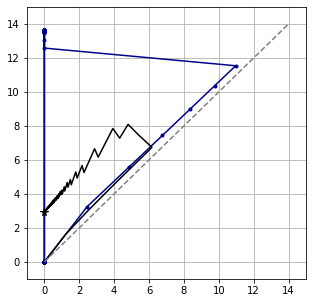

In [28]:
S = 100


fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim(-1, 15)
plt.ylim(-1, 15)

plt.plot(xsS[S][:,0], xsS[S][:,1], '.-',color='darkblue')
T = xsS[S].shape[0]
plt.plot(np.cumsum(xsS[S][:,0]) / np.arange(1, T+1,1), np.cumsum(xsS[S][:,1])/np.arange(1, T+1,1), 'k-')


param.S = np.array([S, S])
t0, m0, t1, m1 = get_ne(TeqS[S], param)
plt.plot([np.sum(t0 * m0)], [np.sum(t1 * m1)], 'k*', markersize=8)
plt.plot([0, 14], [0, 14], color='gray', linestyle='--')

plt.grid()
plt.savefig("./fig/fp-S-100.pdf", bbox_inches='tight')

# S=10 (Fig 2c)

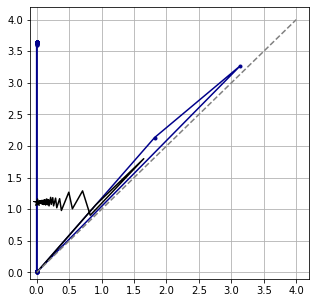

In [29]:
S = 10


fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim(-0.1, 4.2)
plt.ylim(-0.1, 4.2)


plt.plot(xsS[S][:,0], xsS[S][:,1], '.-', color='darkblue')
T = xsS[S].shape[0]
plt.plot(np.cumsum(xsS[S][:,0]) / np.arange(1, T+1,1), np.cumsum(xsS[S][:,1])/np.arange(1, T+1,1), 'k-')

param.S = np.array([S, S])
t0, m0, t1, m1 = get_ne(TeqS[S], param)
plt.plot([np.sum(t0 * m0)], [np.sum(t1 * m1)], 'k*', markersize=8)
plt.plot([0, 4], [0, 4], color='gray', linestyle='--')

plt.grid()
plt.savefig("./fig/fp-S-10.pdf", bbox_inches='tight')